In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
df = pd.read_csv("kc_house_data.csv")
columns_to_drop = ["zipcode", "lat", "long"]
df = df.drop(columns=columns_to_drop)

In [3]:
#count the number of categorical variables
cat_count = 0
for dtype in df.dtypes:
    if dtype == 'object':
        cat_count = cat_count + 1

print('# of categorical variables:',cat_count)
print('# of contineous variables:',df.shape[1] - cat_count - 1) #subt

# of categorical variables: 1
# of contineous variables: 16


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [5]:
print(df.columns)
df.shape

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


(21613, 18)

In [6]:
# Target variable
y = df['price']
# Define the predictor variables
X = df.drop(columns=['id', 'date', 'price'])
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Add a constant term to the predictor variables
X_train = sm.add_constant(X_train)

# Build and fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate the mean squared error
mse = ((y_train - y_pred) ** 2).mean()

# Calculate the root mean squared error
rmse = mse ** 0.5

# R-squared
r_squared = model.rsquared

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Squared Error: 45279317795.079605
Root Mean Squared Error: 212789.3742532263
R-squared: 0.6534267261273158


In [8]:
# Multiple linear regerssion model Summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2326.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:11:38   Log-Likelihood:            -2.3665e+05
No. Observations:               17290   AIC:                         4.733e+05
Df Residuals:                   17275   BIC:                         4.734e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.308e+06   1.53e+05     41.366

If we look at the R-square and the adjusted R-square, we can see The R-squared value is 0.653, indicating that approximately 65.3% of the variance in the dependent variable (price) is explained by the independent variables in the model. The Adjusted R-squared is also 0.653, suggesting that the model's goodness of fit is consistent even when adjusting for the number of predictors. Looking at the F-statistic, the F-statistic is 2326, and the associated probability (Prob (F-statistic)) is very close to zero (0.00). This suggests that the overall regression model is statistically significant, and at least one of the independent variables is contributing significantly to the prediction of the dependent variable. And as we observed the coefficent, we can see the associated p-values (P>|t|) indicate the statistical significance of each variable. Variables with p-values less than the chosen significance level (often 0.05) are considered statistically significant. For example, 'bedrooms,' 'bathrooms,' 'sqft_living,' 'floors,' 'waterfront,' 'view,' 'condition,' 'grade,' 'sqft_above,' 'sqft_basement,' 'yr_built,' 'yr_renovated,' 'sqft_living15,' and 'sqft_lot15' are all statistically significant.

In [9]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

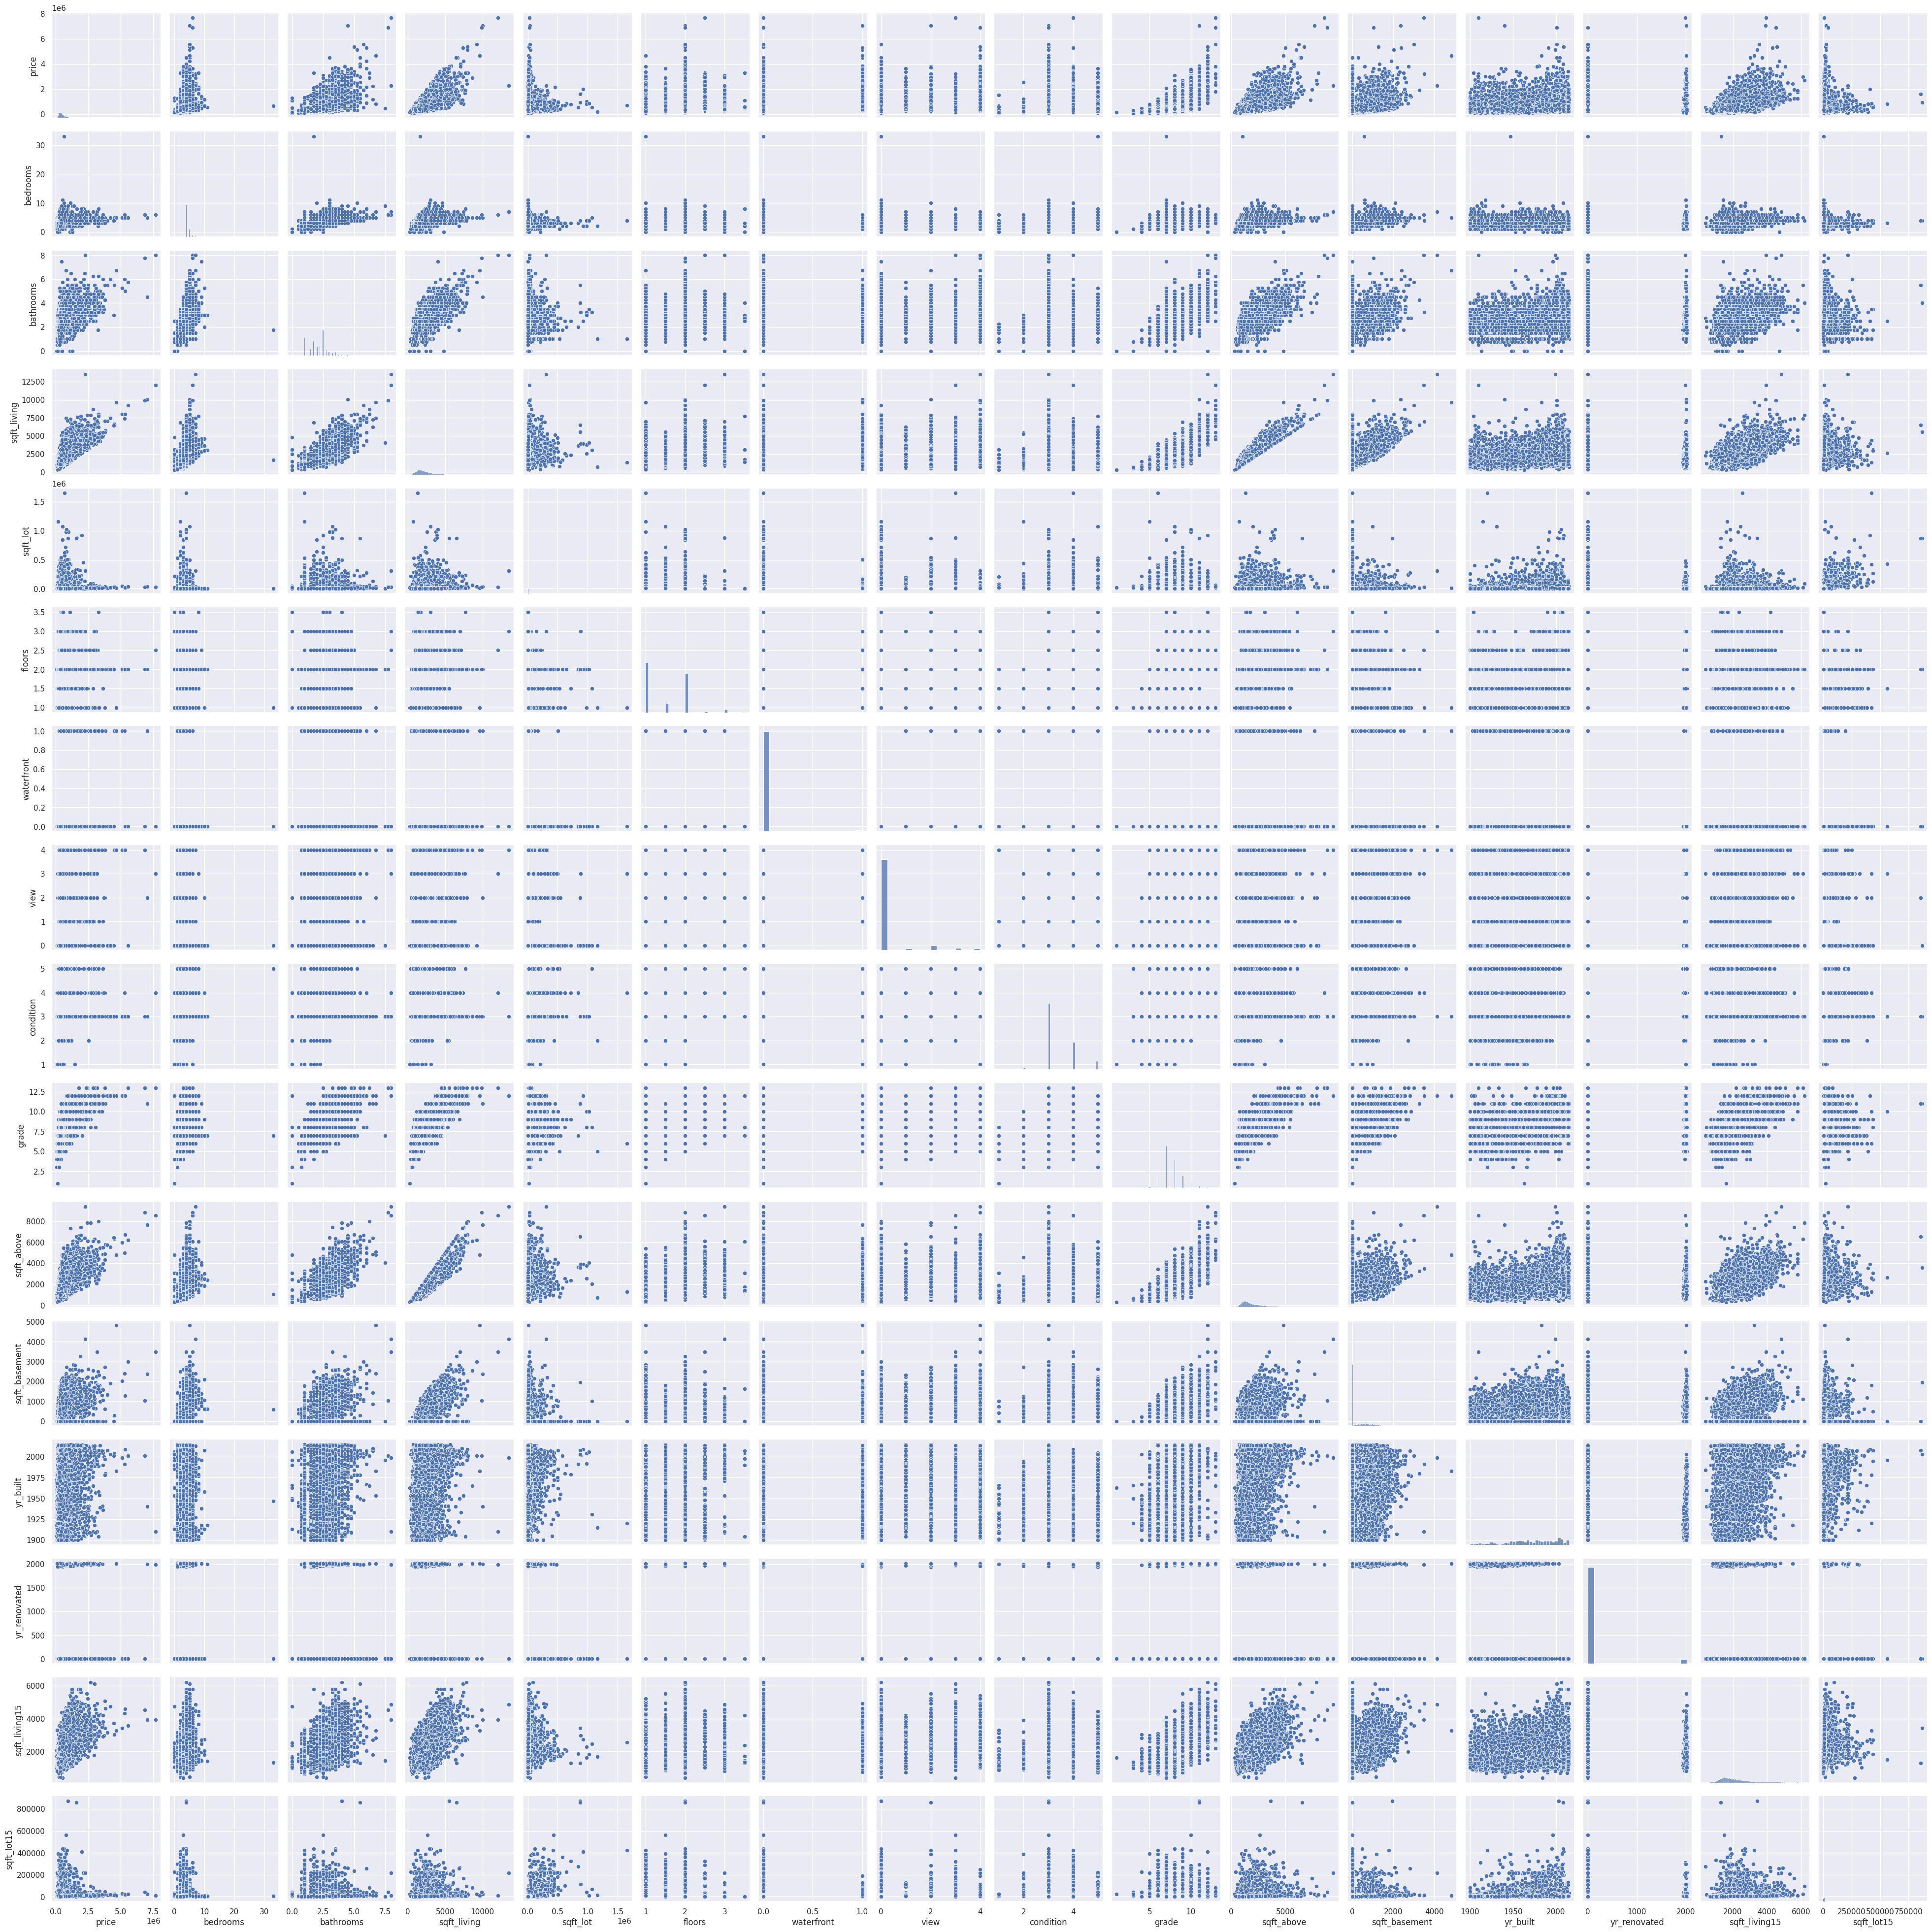

In [10]:
#scatterplot
sns.set()
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
sns.pairplot(df[cols], height = 2.5)
plt.show()

In [11]:
#Correlation map to see how features are correlated with price
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
# Create a heatmap using seaborn with values displayed
sns.heatmap(corrmat, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", ax=ax)

ValueError: could not convert string to float: '20141013T000000'

Based of the correlation matrix we can see which variables contributes the most with price. In this case we can see that sqft_living is the most strongly positively correlated at 0.70. Other variables relating to price, such as sqft above and the sqft basement also hold high postive correlation at 0.67 and 0.61. 